In [1]:
import gym
import warnings
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange
from cryoenv.mqtt import SoftActorCritic, ReturnTracker, HistoryWriter
%config InlineBackend.figure_formats = ['svg']

In [2]:
np.random.seed(5)

In [3]:
torch.cuda.is_available()

False

In [4]:
warnings.simplefilter('ignore')
gym.logger.set_level(40)

In [5]:
buffer_size = 1000

env = gym.make('cryoenv:cryoenv-sig-v0',
                   omega=0,
                   sample_pars=False,
                   log_reward=False,
                   rand_start=True,
                   relax_time=45,
                   tpa_in_state=True,
                   pars={'store_raw': False,
                         'max_buffer_len': buffer_size,
                         'tpa_queue': [1,5,10],
                         'pileup_prob': 0.,
                         'xi': np.array([1e2]),
                         'tau': np.array([45]), 
                         'tp_interval': 10},
               render_mode='human',
                   )

In [6]:
obs, info = env.reset()

In [7]:
model = SoftActorCritic(env, policy = "GaussianPolicy", critic = "QNetwork", lr=3e-4, buffer_size=buffer_size, learning_starts=0,
                        batch_size=16, gamma=.9, gradient_steps=20, grad_clipping=.5, tau=0.005, 
                        device='cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
tracker = ReturnTracker()
writer = HistoryWriter()

In [9]:
model.learn(episodes = 5, 
            episode_steps = 40, 
            two_pbars=True,
            tracker=tracker,
            writer=writer)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

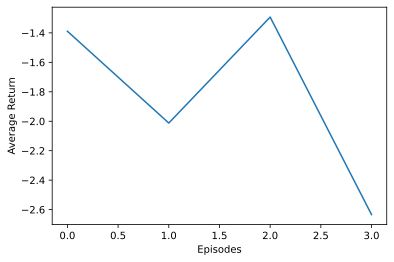

In [10]:
tracker.plot(smooth=1)

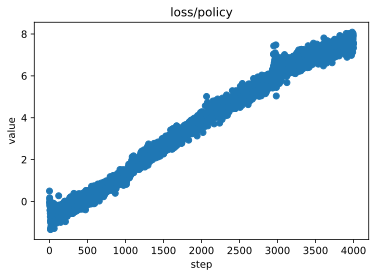

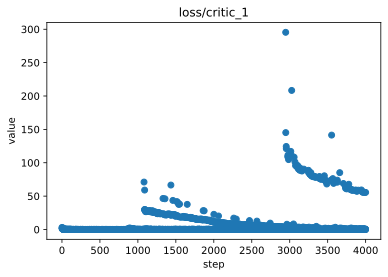

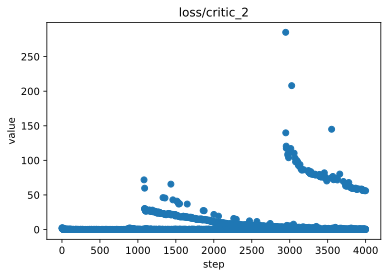

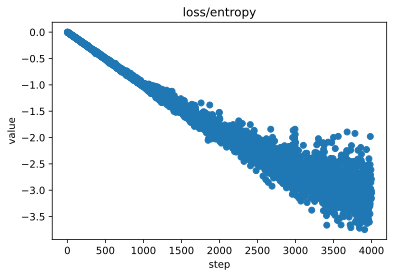

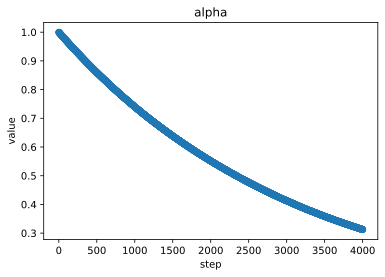

In [11]:
for key in writer.history.keys():
    writer.plot(key)

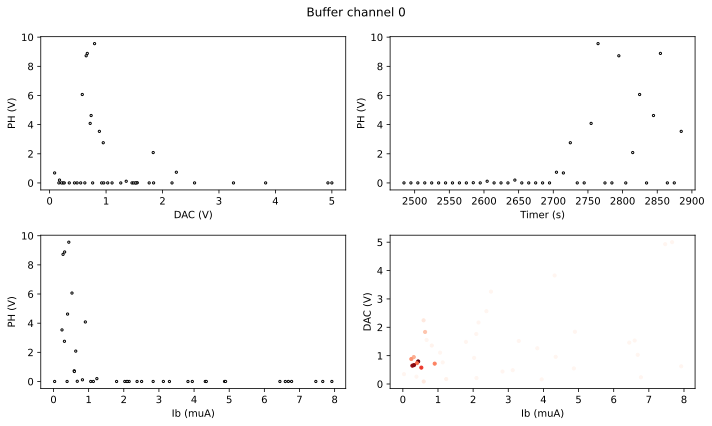

In [12]:
env.detector.plot_buffer()

  0%|          | 0/10 [00:00<?, ?it/s]

[[ 0.34978902 -0.28709042]]
[-0.99994462 -0.99998419 -0.28709042  0.34978902  3.         -0.11643518
  0.73103753] -2.8550991555584164


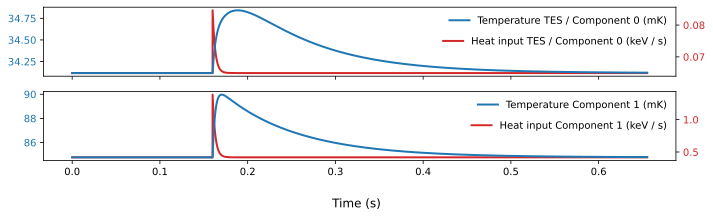

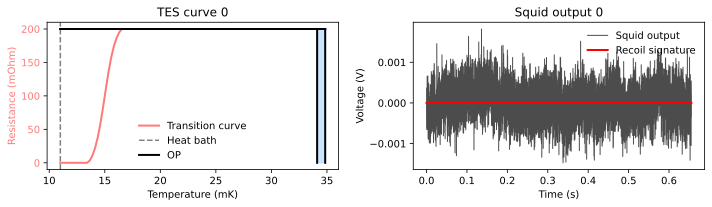

[[0.01298555 0.2035293 ]]
[-0.99992399 -0.99997916  0.20352936  0.01298559 -0.6        -0.13378979
  0.58278155] -0.27412065221583826


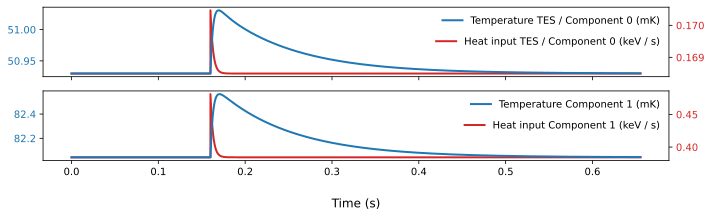

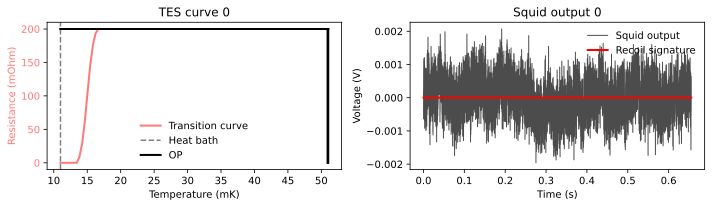

[[-0.1774296 -0.7567127]]
[-0.99994864 -0.99998808 -0.75671268 -0.17742956  1.          0.04365405
  0.50201006] -1.160162066561239


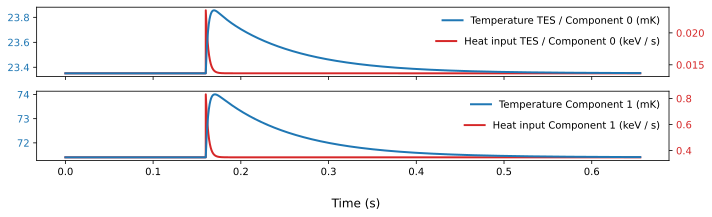

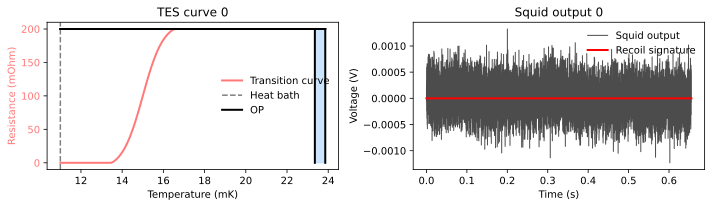

[[-0.4172257  -0.70833355]]
[-0.99996186 -0.99998826 -0.70833355 -0.41722572  3.          0.17609982
  0.48511572] -3.0785010536005233


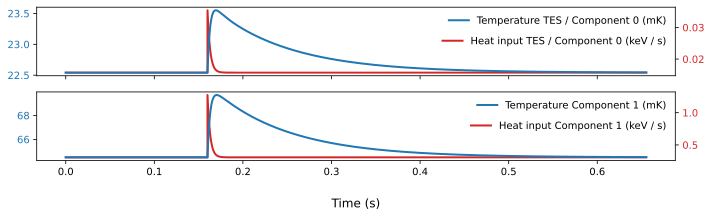

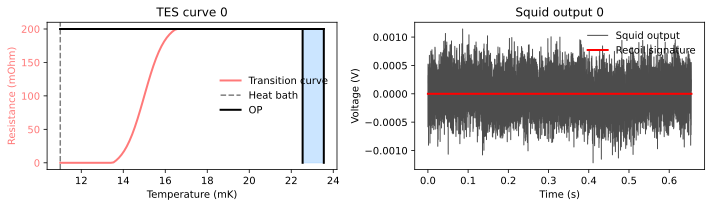

[[-0.24696805 -0.10826724]]
[-0.99994713 -0.99998218 -0.10826719 -0.24696803 -0.6         0.16258332
  0.43766179] -0.3370714922362732


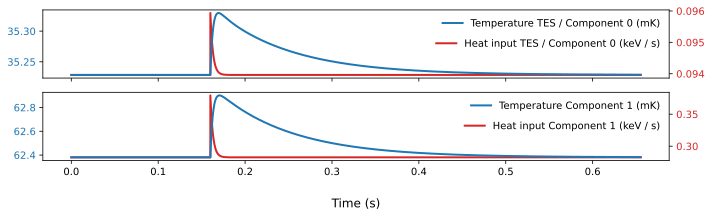

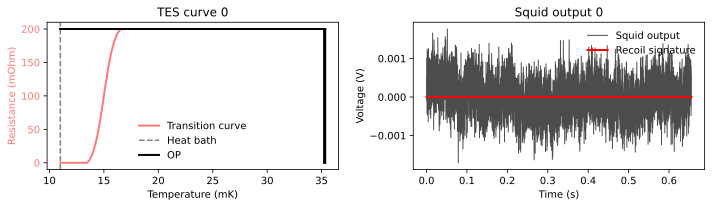

[[-0.6030716 -0.8264866]]
[-0.9999565  -0.99998856 -0.82648659 -0.60307157  1.          0.29487441
  0.47062178] -1.3147368713129195


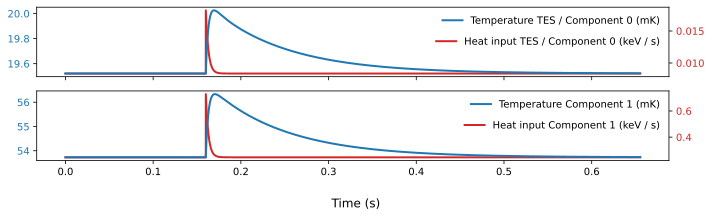

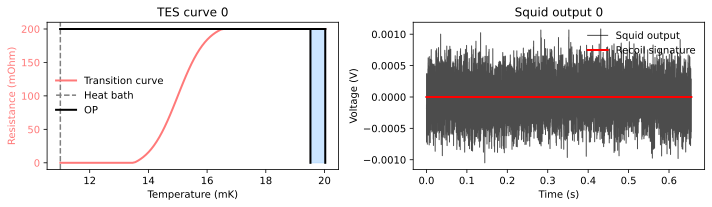

[[-0.71279377 -0.8217488 ]]
[-0.9999585  -0.99998896 -0.82174879 -0.71279377  3.          0.39986078
  0.51887761] -2.659312285135626


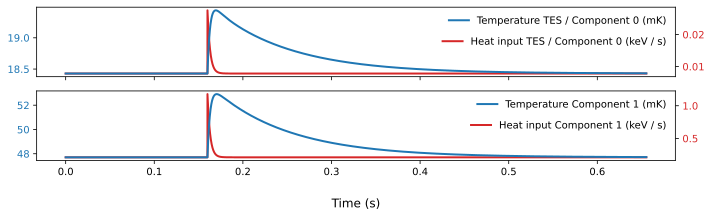

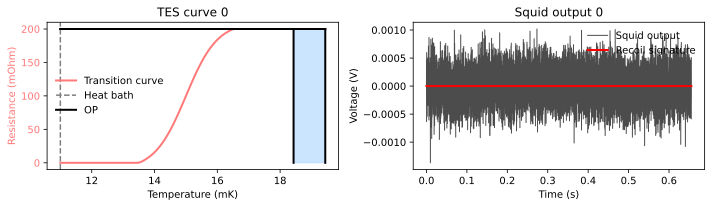

[[-0.33006305 -0.42322454]]
[-0.99995697 -0.99998647 -0.42322457 -0.33006305 -0.6         0.40451631
  0.48125393] -0.314332107481153


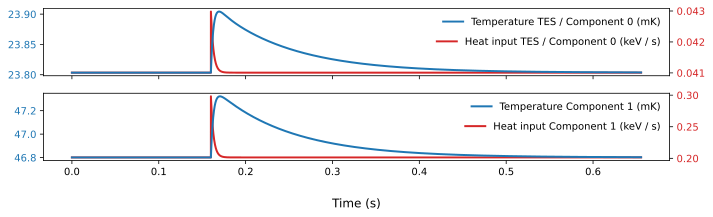

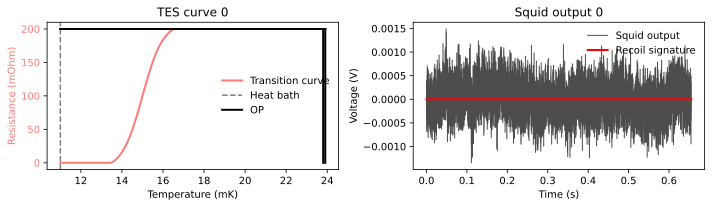

[[-0.7801347 -0.8823249]]
[-0.99995392 -0.99998912 -0.88232487 -0.78013468  1.          0.49972569
  0.54080969] -1.1810923477058322


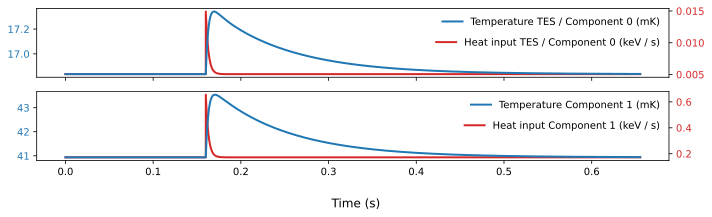

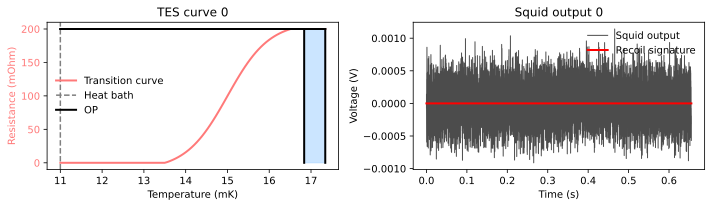

[[-0.76112324 -0.84016377]]
[-0.99113899 -0.99998909 -0.84016377 -0.76112324  3.          0.56756227
  0.58470994] -0.012310747662828924


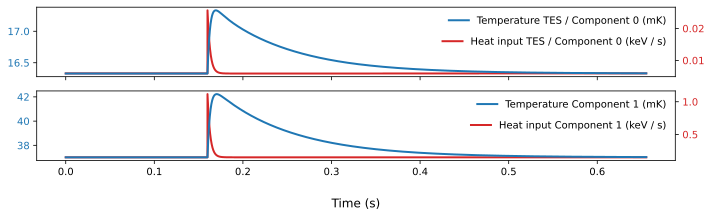

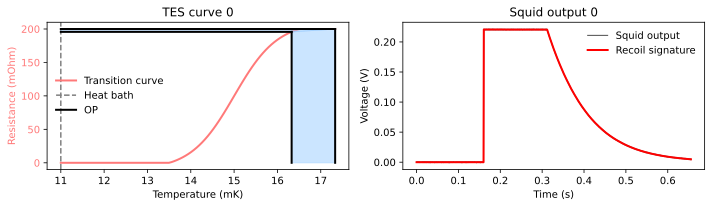

In [13]:
obs, _ = env.reset()
model.policy.eval()
returns = 0
for i in trange(10):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action.flatten())
    print(action)
    print(obs, reward)
    returns += reward
    env.render()
    if terminated or truncated:
        obs, _ = env.reset()

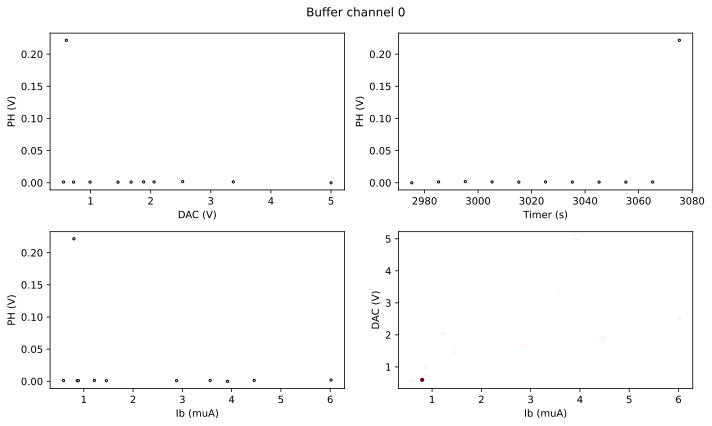

In [14]:
env.detector.plot_buffer()

In [15]:
# env.close()

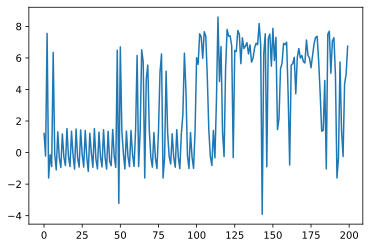

In [18]:
plt.plot(- np.log(- model.buffer.reward_memory[:200]))

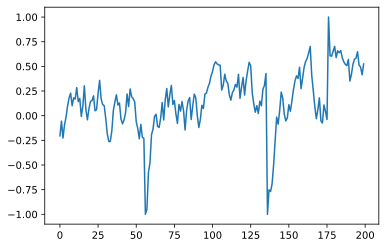

In [33]:
plt.plot(model.buffer.state_memory[:200,6])